<a href="https://colab.research.google.com/github/DevarshShroff/Reddit_Fake_News_Detection/blob/main/Reddit_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-Processing Common steps to clean dataset
---



In [10]:
import pandas as pd
import regex as re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)



    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)


file = "/content/xy_train.csv"

df = pd.read_csv(file)
df = df[df['label'] != 2]   # Remvoing entries with label as 2]

df['text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Vectorizing with TF-IDF and
using  Logistic regression, Linear SVM, SGDClassifier

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Step 0: Pre-Processing Text
stemmer = PorterStemmer()

def stem_text(text):
    words = text.split()  # Tokenize cleaned text
    filtered = [stemmer.stem(word) for word in words ]
    return ' '.join(filtered)

df['text'] = df['text'].apply(stem_text)

# Step 0: vectorizing with TF-IDF
vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95
)

X = vectorizer.fit_transform(df['text'])  # TF-IDF features
y = df['label']                           # Target labels

# Step 2: Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# lr_param_grid = {
#     'C': [0.01, 0.1, 1, 10],
#     'penalty': ['l2'],
#     'solver': ['liblinear']}
# lr_grid = GridSearchCV(LogisticRegression(max_iter=5000), lr_param_grid, cv=5, scoring='accuracy')
# lr_grid.fit(X_train, y_train)
# # --- Grid Search for Linear SVM ---
# svm_param_grid = {
#     'C': [0.01, 0.1, 1, 10],
#     'loss': ['hinge', 'squared_hinge']}
# svm_grid = GridSearchCV(LinearSVC(max_iter=5000), svm_param_grid, cv=5, scoring='accuracy')
# svm_grid.fit(X_train, y_train)
# # --- Grid Search for SGD Classifier ---
# sgd_param_grid = {
#     'loss': ['hinge', 'log_loss'],
#     'alpha': [1e-4, 1e-3, 1e-2],
#     'penalty': ['l2', 'l1']}
# sgd_grid = GridSearchCV(SGDClassifier(max_iter=3000, tol=1e-3), sgd_param_grid, cv=5, scoring='accuracy')
# sgd_grid.fit(X_train, y_train)

lr = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=5000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

svm = LinearSVC(C=0.1, loss='squared_hinge', max_iter=5000)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

sgd = SGDClassifier(alpha=0.0001, loss='hinge', penalty='l2', max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
acc_sgd = accuracy_score(y_test, y_pred_sgd)

print(f" Logistic Regression Accuracy: {acc_lr:.4f}")
print(f" Linear SVM Accuracy:          {acc_svm:.4f}")
print(f" SGD Classifier Accuracy:      {acc_sgd:.4f}")


 Logistic Regression Accuracy: 0.7864
 Linear SVM Accuracy:          0.7870
 SGD Classifier Accuracy:      0.7835


## Producing a confusion matrix to understand accuracy

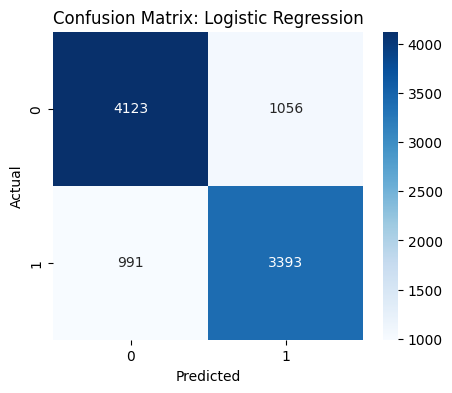

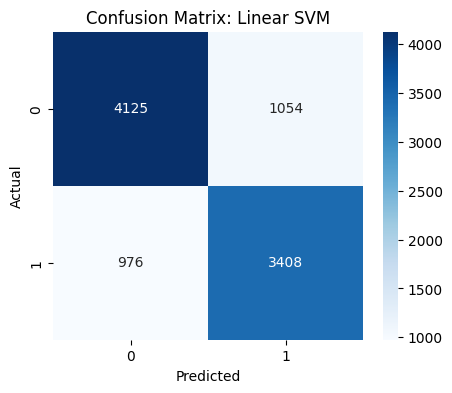

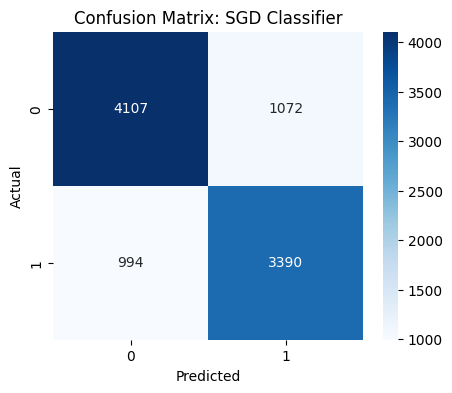

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# After predictions are made:
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_svm, 'Linear SVM')
plot_confusion_matrix(y_test, y_pred_sgd, 'SGD Classifier')

# Using word2vec encodings


In [1]:
#! pip install gensim scikit-learn xgboost
import pandas as pd
import regex as re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)



    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)


file = "/content/xy_train.csv"

df = pd.read_csv(file)
df = df[df['label'] != 2]   # Remvoing entries with label as 2]

df['text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Working with Word2Vec Encodings

In [2]:
import numpy as np
import gensim.downloader as api
import pandas as pd
import re
from sklearn.model_selection import train_test_split

# Load the pre-trained GloVe word vectors (100 dimensions)
word_vectors = api.load("glove-wiki-gigaword-100")


def simple_tokenize(text):
    # Lowercase and tokenize using regex (basic)
    return re.findall(r'\b\w+\b', text.lower())

def document_vector(text):
    tokens = simple_tokenize(text)
    embeddings = [word_vectors[word] for word in tokens if word in word_vectors]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(word_vectors.vector_size)

# Vectorize all documents
X = np.array([document_vector(doc) for doc in df['text']])
y = df['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[==================================================] 100.0% 128.1/128.1MB downloaded


## Using classifers on generated encodings

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr.predict(X_test)))

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

# XGBoost
xgb = XGBClassifier( eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb.predict(X_test)))

# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test)))

Logistic Regression Accuracy: 0.7164069852556729
Random Forest Accuracy: 0.7359615183519816
XGBoost Accuracy: 0.741817421311304
SVM Accuracy: 0.7179755306912057


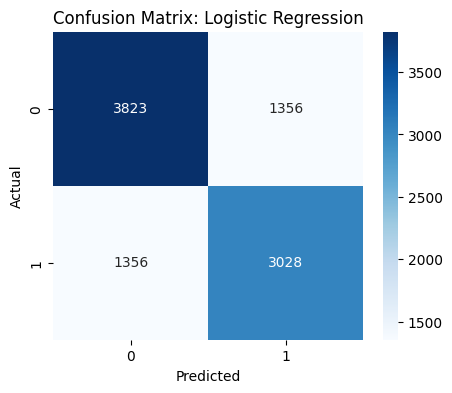

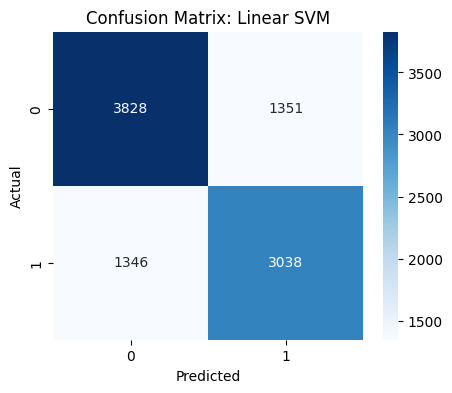

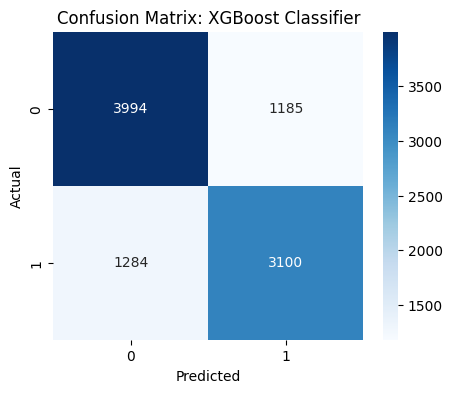

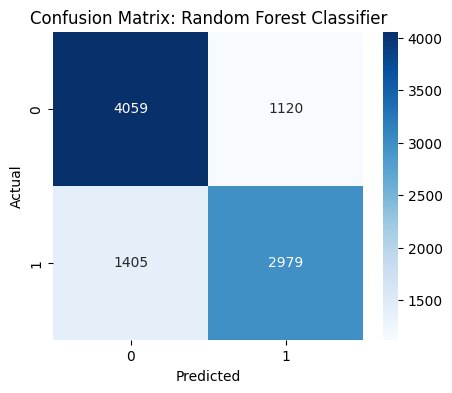

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# After predictions are made:
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_svm, 'Linear SVM')
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost Classifier')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Classifier')

## Using fast text encodings and using clustering algorithms


In [1]:
import pandas as pd
import regex as re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)



    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)


file = "/content/xy_train.csv"

df = pd.read_csv(file)
df = df[df['label'] != 2]   # Remvoing entries with label as 2]

df['text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Downloading and Applying Embeddings

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import gensim.downloader as api
import re

ft = api.load("fasttext-wiki-news-subwords-300")
VECTOR_SIZE = ft.vector_size  # 300

def simple_tokenize(s):
    return re.findall(r"[A-Za-z]+", s.lower())

def doc_vector(text):
    tokens = simple_tokenize(text)
    if not tokens:
        return np.zeros(VECTOR_SIZE, dtype=np.float32)

    vecs = []
    for w in tokens:
        if w in ft:  # check if in vocab
            vecs.append(ft[w])
        # else: skip or use zeros; skipping usually works better

    if not vecs:
        return np.zeros(VECTOR_SIZE, dtype=np.float32)
    return np.mean(vecs, axis=0).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(
    df["text"].astype(str),
    df["label"].to_numpy(),
    test_size=0.2,
    random_state=42,
    stratify=df["label"].to_numpy())

doc_vectors_train = np.vstack([doc_vector(t) for t in X_train])
doc_vectors_test = np.vstack([doc_vector(t) for t in X_test])

scaler = StandardScaler(with_mean=True, with_std=True)
doc_vectors_train_std = scaler.fit_transform(doc_vectors_train)
doc_vectors_test_std = scaler.transform(doc_vectors_test)


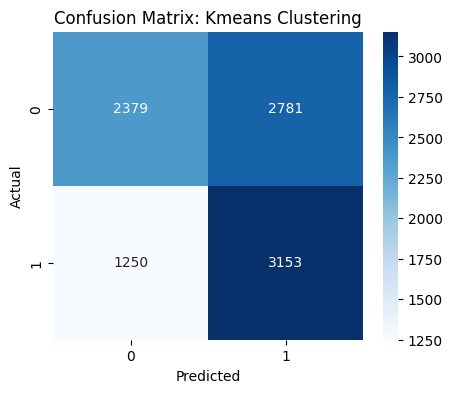

In [21]:
kmeans = KMeans(n_clusters=2, random_state=65, n_init="auto")
train_labels = kmeans.fit_predict(doc_vectors_train_std)
test_labels = kmeans.predict(doc_vectors_test_std)

def majority_label(y):
    if y.size == 0:
        return 0
    counts = np.bincount(y.astype(int))
    return counts.argmax()

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

cluster_to_class = {}
for c in range(2):
    idx = np.where(train_labels == c)[0]
    cluster_to_class[c] = majority_label(y_train[idx])

y_pred_kmeans = np.array([cluster_to_class[c] for c in test_labels])



# After predictions are made:
plot_confusion_matrix(y_test, y_pred_kmeans, 'Kmeans Clustering')


# Neural Network Approach

Epoch 1/4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


538/538 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - AUC: 0.6761 - loss: 0.6128 - val_AUC: 0.8848 - val_loss: 0.4293 - learning_rate: 0.0010
Epoch 2/4
  3/538 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - AUC: 0.8904 - loss: 0.4381

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


538/538 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - AUC: 0.9234 - loss: 0.3466 - val_AUC: 0.8671 - val_loss: 0.4799 - learning_rate: 0.0010
Epoch 3/4
538/538 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - AUC: 0.9802 - loss: 0.1726 - val_AUC: 0.8398 - val_loss: 0.8315 - learning_rate: 0.0010
Epoch 4/4
538/538 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - AUC: 0.9978 - loss: 0.0521 - val_AUC: 0.8186 - val_loss: 1.3439 - learning_rate: 0.0010
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 0.7530063787514378
F1 (macro): 0.752236711402211
F1 (binary, pos=1): 0.7384274640088594

Classification report:
               precision    recall  f1-score   support

           0     0.7834    0.7494    0.7660      5160
           1     0.7206    0.7572    0.7384      4403

    accuracy                         0.7530      9563
   macro avg     0.7520    0.7533    0.7522      9563
weighted avg     0.7545    0.7530    0.7533      9563



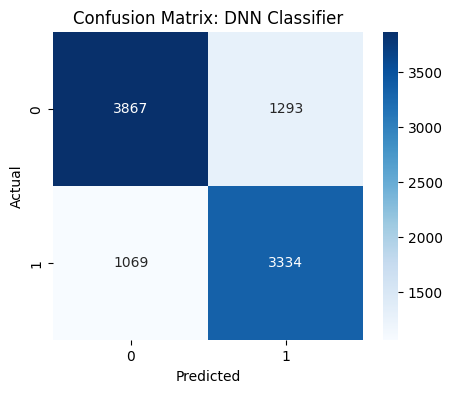

In [27]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)


TEXT_COL = "text"
LABEL_COL = "label"

X_text = df[TEXT_COL].astype(str).values
y = df[LABEL_COL].astype(int).values

# 80/20 split (stratified)
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.20, random_state=seed, stratify=y
)

# From training only, carve out a validation set (e.g., 10% of training)
X_train_text, X_val_text, y_train, y_val = train_test_split(
    X_train_text, y_train, test_size=0.10, random_state=seed, stratify=y_train
)

# ----- 2) Tokenize & vectorize (no leakage: fit on train only) -----
max_words = 10000   # vocabulary size
max_len = 100       # sequence length
oov_tok = "<OOV>"   # token for unseen words

tok = Tokenizer(num_words=max_words, oov_token=oov_tok)
tok.fit_on_texts(X_train_text)

def to_seq(texts):
    seqs = tok.texts_to_sequences(texts)
    return pad_sequences(seqs, maxlen=max_len, padding="post", truncating="post")

X_train_vec = to_seq(X_train_text)
X_val_vec   = to_seq(X_val_text)
X_test_vec  = to_seq(X_test_text)


dnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

es = EarlyStopping(monitor='val_auc', mode='max', patience=2, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_auc', mode='max', factor=0.5, patience=1, min_lr=1e-5)


history = dnn_model.fit(
    X_train_vec, y_train,
    validation_data=(X_val_vec, y_val),
    epochs=4,
    batch_size=64,
    callbacks=[es, rlr],
    verbose=1
)


y_prob = dnn_model.predict(X_test_vec).ravel()
y_pred_dnn = (y_prob >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_dnn))
print("F1 (macro):", f1_score(y_test, y_pred_dnn, average="macro"))
print("F1 (binary, pos=1):", f1_score(y_test, y_pred_dnn, pos_label=1))
print("\nClassification report:\n", classification_report(y_test, y_pred_dnn, digits=4))
plot_confusion_matrix(y_test, y_pred_dnn, 'DNN Classifier')
